In [27]:
# spacy needs to run in another conda environment (probably issue of the use of CPU with conda & spacy for mac)
# in terminal conda activate nlp (env name)
#import spacy
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

from datetime import datetime
from collections import Counter

### Preliminary analysis for the final dataset

#### Prepare the dataset

In [2]:
df = pd.read_csv('3_fewshot_classification_data_final.csv')
df.drop(labels = ['Unnamed: 0', 'keep'], axis = 1, inplace = True)
pd.set_option('display.max_columns', None)

In [3]:
len(df)

87991

In [4]:
df.head()

,index,filename,text_original,year,month,outlet,country,text_clean,south
0,9029,"'Empire' may yet fade, as climate catastrophe ...","\r\nNovember 1, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 1, 2021 Copyright 2021 The New Zealan...",0
1,9034,'Native peoples hold key to climate solutions'...,"\r\nNovember 2, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 2, 2021 Copyright 2021 The New Zealan...",0
2,9039,'Shock' after car-parks idea.rtf,"\r\nNovember 4, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 4, 2021 Copyright 2021 The New Zealan...",0
3,9043,$150m for Pacific projects.rtf,"\r\nAugust 16, 2019\r\n\r\n\r\nCopyright 2019 ...",2019,8,The New Zealand Herald,New Zealand,"August 16, 2019 Copyright 2019 The New Zealand...",0
4,9051,_Achievable and affordable__ PM Jacinda Ardern...,"\r\nJanuary 31, 2021 Sunday\r\n\r\n\r\nCopyrig...",2021,1,The New Zealand Herald,New Zealand,"January 31, 2021 Sunday Copyright 2021 The New...",0


In [7]:
names = ["climate change", "global warming", "greenhouse effect", "climate warming",
         "climatic change", "greenhouse warming", "warming climate", "changing climate", "warmer climate",
         "planetary warming", "climatic disruption", "climate catastrophe", "climate chaos", "climate crisis", 
         "climate disaster", "climate emergency", "global heating", "climate breakdown", "climate threat"]

In [5]:
def words_present_anywhere(text, query):
    import re
    text = str(text).lower()
    newtext = re.sub(r'[^\w\s]', ' ', text)
    newtext = " ".join(newtext.split())
    query = str(query).lower()
    count = newtext.count(query)
    return count

In [8]:
for name in names:
    df[name] = df['text_clean'].apply(words_present_anywhere, args=(name,))

In [12]:
df["label_sum"] = df.iloc[:,9:28].sum(axis=1)
df["neutral"] = df.iloc[:,9:19].sum(axis=1)
df["urgent"] = df.iloc[:,19:28].sum(axis=1)
#df.drop(df[df['label_sum'] < 2].index, inplace = True)
#df = df.reset_index().drop(['level_0'], axis=1)

In [66]:
df["climate/climatic change"] = df["climate change"] + df["climatic change"]

In [10]:
len(df)

87991

In [16]:
df.head()

,index,filename,text_original,year,month,outlet,country,text_clean,south,climate change,global warming,greenhouse effect,climate warming,climatic change,greenhouse warming,warming climate,changing climate,warmer climate,planetary warming,climatic disruption,climate catastrophe,climate chaos,climate crisis,climate disaster,climate emergency,global heating,climate breakdown,climate threat,label_sum,neutral,urgent
0,9029,"'Empire' may yet fade, as climate catastrophe ...","\r\nNovember 1, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 1, 2021 Copyright 2021 The New Zealan...",0,2,2,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,7,4,3
1,9034,'Native peoples hold key to climate solutions'...,"\r\nNovember 2, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 2, 2021 Copyright 2021 The New Zealan...",0,1,2,0,0,0,0,0,0,0,0,0,0,1,3,0,0,0,0,0,7,3,4
2,9039,'Shock' after car-parks idea.rtf,"\r\nNovember 4, 2021\r\n\r\n\r\nCopyright 2021...",2021,11,The New Zealand Herald,New Zealand,"November 4, 2021 Copyright 2021 The New Zealan...",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,9043,$150m for Pacific projects.rtf,"\r\nAugust 16, 2019\r\n\r\n\r\nCopyright 2019 ...",2019,8,The New Zealand Herald,New Zealand,"August 16, 2019 Copyright 2019 The New Zealand...",0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0
4,9051,_Achievable and affordable__ PM Jacinda Ardern...,"\r\nJanuary 31, 2021 Sunday\r\n\r\n\r\nCopyrig...",2021,1,The New Zealand Herald,New Zealand,"January 31, 2021 Sunday Copyright 2021 The New...",0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,6,0


In [68]:
for name in names:
    df[name+"_binary"] = df.apply(lambda x: 0 if x[name] == 0 else 1, axis=1) 

df["neutral_binary"] = df.apply(lambda x: 0 if x["neutral"] == 0 else 1, axis=1) 
df["urgent_binary"] = df.apply(lambda x: 0 if x["urgent"] == 0 else 1, axis=1) 

In [70]:
df["climate/climatic change_binary"] = df.apply(lambda x: 0 if x["climate/climatic change"] == 0 else 1, axis=1) 

In [19]:
df["outlet"].value_counts(normalize=True)

Guardian                     0.155868
The Australian               0.115853
The New York Times           0.094282
The Sydney Morning Herald    0.086634
Hindu                        0.073758
Toronto Star                 0.069325
The Times                    0.067291
Times of India               0.065723
GlobeMail                    0.060518
The Washington Post          0.058142
The New Zealand Herald       0.050846
The Press                    0.035504
The Nation                   0.022491
Bangkok Post                 0.020650
The Star                     0.018422
Sunday Times                 0.004694
Name: outlet, dtype: float64

In [20]:
df["outlet"].value_counts()

Guardian                     13715
The Australian               10194
The New York Times            8296
The Sydney Morning Herald     7623
Hindu                         6490
Toronto Star                  6100
The Times                     5921
Times of India                5783
GlobeMail                     5325
The Washington Post           5116
The New Zealand Herald        4474
The Press                     3124
The Nation                    1979
Bangkok Post                  1817
The Star                      1621
Sunday Times                   413
Name: outlet, dtype: int64

In [21]:
df["neutral_binary"].value_counts(normalize=True)

1    0.982362
0    0.017638
Name: neutral_binary, dtype: float64

In [22]:
df["urgent_binary"].value_counts(normalize=True)

0    0.905263
1    0.094737
Name: urgent_binary, dtype: float64

In [71]:
df.to_csv("5_descriptive_analysis_data_analyzed.csv")
df.to_csv('5_descriptive_analysis_data_analyzed.txt', sep='\t', index=False)

#### RQ1: How often are neutral and activist compounds used?

In [72]:
df2=df[["climate/climatic change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
        "greenhouse warming_binary", "warming climate_binary", "changing climate_binary",
        "warmer climate_binary", "planetary warming_binary", "climatic disruption_binary",
         "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
        "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary"]]

In [73]:
c = list()
c = df2.columns.tolist()
for i in range(len(c)): #Loop every column
        c[i] = c[i].replace("_binary",'')

df2.columns = c

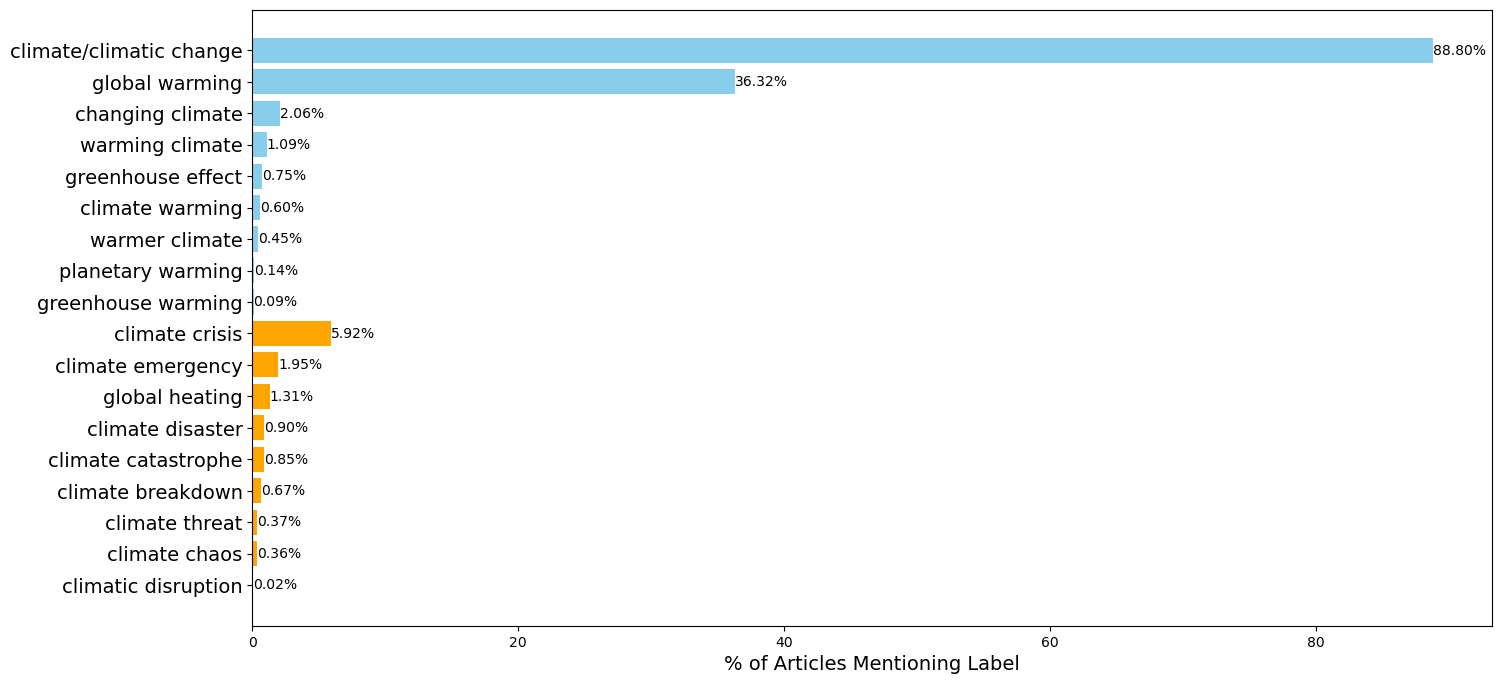

In [75]:
percentages = (df2.sum() / len(df2)) * 100
percentages1 = percentages[["climate/climatic change", "global warming", "greenhouse effect", "climate warming",
         "greenhouse warming", "warming climate", "changing climate",
                           "warmer climate", "planetary warming"]].sort_values(ascending=True)
percentages2 = percentages[["climatic disruption",
         "climate catastrophe", "climate chaos", "climate crisis", "climate disaster", 
        "climate emergency", "global heating", "climate breakdown", "climate threat"]].sort_values(ascending=True)
percentages = pd.concat([percentages2,percentages1])


#colors = ['skyblue' if i < 7 else 'orange' for i in range(len(percentages))]
colors=['skyblue' if col in ["climate/climatic change", "global warming", "greenhouse effect", "climate warming",
         "greenhouse warming", "warming climate","changing climate",
                        "warmer climate", "planetary warming"] else 'orange' for col in percentages.index]

plt.figure(figsize=(16, 8))
bars = plt.barh(percentages.index, percentages.values, color=colors)

for bar, percentage in zip(bars, percentages.values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{percentage:.2f}%', va='center', clip_on=True)


#plt.figure(figsize=(10, 8))
#percentages.plot(kind='barh')
plt.xlabel('% of Articles Mentioning Label', fontsize = 14, y=-0.25)
plt.yticks(fontsize = 14)
#plt.xticks(rotation=45)
plt.show()

In [76]:
df3 = df2[["climate/climatic change", "global warming", "changing climate", "climate crisis",
        "climate emergency", "global heating"]]

In [77]:
df3["other neutral"] = df2[["greenhouse effect","climate warming", 
                            "greenhouse warming", "warming climate", "warmer climate", 
                           "planetary warming"]].sum(axis=1)
df3["other urgent"] = df2[["climatic disruption","climate catastrophe", 
                                   "climate chaos","climate disaster","climate breakdown", 
                                   "climate threat"]].sum(axis=1)

/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_47101/2482843840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["other neutral"] = df2[["greenhouse effect","climate warming",
/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_47101/2482843840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["other urgent"] = df2[["climatic disruption","climate catastrophe",


In [78]:
col = df3.pop('other neutral')
df3.insert(3, col.name, col)

In [79]:
df3.head()

,climate/climatic change,global warming,changing climate,other neutral,climate crisis,climate emergency,global heating,other urgent
0,1,1,0,0,1,0,0,0
1,1,1,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0


In [80]:
table = df3.T.dot(df3)

In [81]:
table

,climate/climatic change,global warming,changing climate,other neutral,climate crisis,climate emergency,global heating,other urgent
climate/climatic change,78137,23965,1725,2236,4653,1298,964,2447
global warming,23965,31957,703,1628,1433,332,260,1055
changing climate,1725,703,1813,186,140,39,30,98
other neutral,2236,1628,186,3005,152,36,25,116
climate crisis,4653,1433,140,152,5211,680,643,902
climate emergency,1298,332,39,36,680,1718,200,329
global heating,964,260,30,25,643,200,1153,349
other urgent,2447,1055,98,116,902,329,349,3267


In [82]:
print(table.corr())

                         climate/climatic change  global warming  \
climate/climatic change                 1.000000        0.739432   
global warming                          0.739432        1.000000   
changing climate                        0.616251        0.435966   
other neutral                           0.514525        0.512773   
climate crisis                          0.596097        0.335762   
climate emergency                       0.421984        0.149564   
global heating                          0.433304        0.141453   
other urgent                            0.480869        0.304881   

                         changing climate  other neutral  climate crisis  \
climate/climatic change          0.616251       0.514525        0.596097   
global warming                   0.435966       0.512773        0.335762   
changing climate                 1.000000       0.247244        0.186525   
other neutral                    0.247244       1.000000        0.083245   
climate

Text(0.5, 1.0, 'Correlations between labels used in articles')

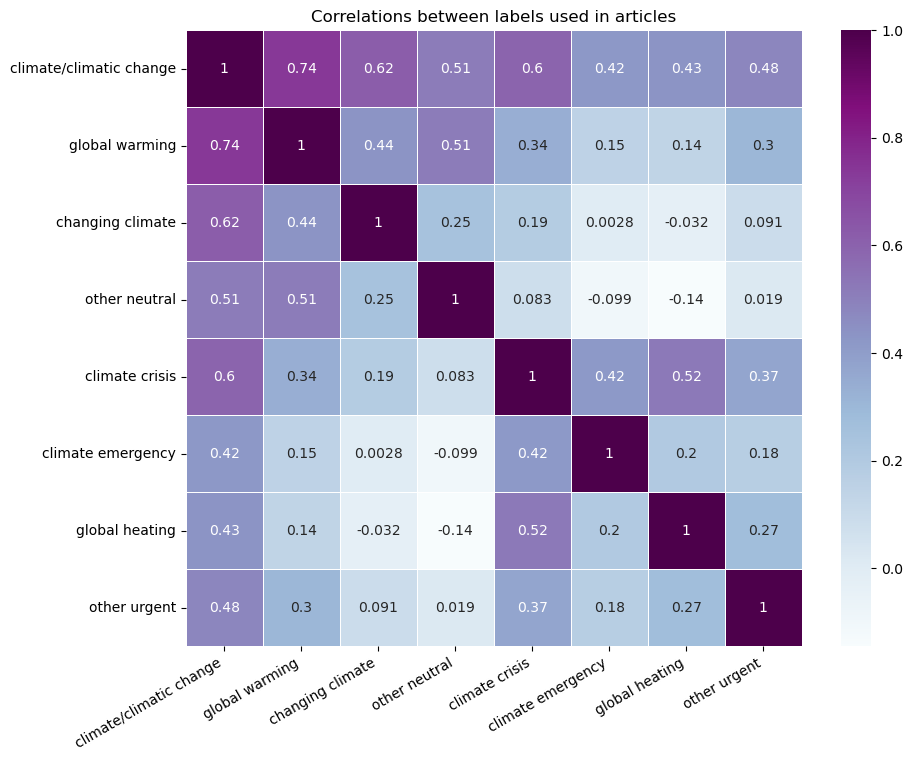

In [83]:
#correlation heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(table.corr(), cmap="BuPu", square=True, annot=True, linewidths=0.5)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, horizontalalignment='right')
ax.set_title("Correlations between labels used in articles")

#### RQ2

In [39]:
df['date_new'] = df['year'].astype(str) + '-' + df['month'].astype(str)
df["date_new"]= pd.to_datetime(df["date_new"])
#df['date_new'] = df['date'].apply(lambda dt: dt.replace(day = 1))

In [50]:
def plotyear(ax,name,colour):   
    labeltime = df[['date_new', name+"_binary"]].groupby(['date_new']).sum()
    labeltime["number_article"]=df[['date_new', 'filename']].groupby(['date_new']).count()
    labeltime["percentage_"+name] = labeltime[name+'_binary']/labeltime["number_article"]*100
    labeltime.reset_index(inplace=True)

    ax.fill_between(labeltime['date_new'], labeltime['percentage_'+name], color=colour, alpha=0.3)
    ax.plot(labeltime['date_new'], labeltime['percentage_'+name], color=colour, label=name)
    years = [2007,2010,2013,2016,2019,2022]
    years=[str(i) for i in years]
    years=pd.to_datetime(years,format="%Y").strftime('%Y')
    p = [0,25,50,75,100]
    ax.set_xticks(years,years,fontsize=12)
    ax.set_yticks(p,p,fontsize=12)
    ax.set_ylabel('% of Articles Mentioning Label',fontsize=14)
    ax.set_title(name,fontsize=16)

/var/folders/xk/pmj2yzyx4cn8730gfyfy07x9p_tk4b/T/ipykernel_47101/113842846.py:2: UserWarning: The figure layout has changed to tight
  fig.tight_layout(pad=4.0)


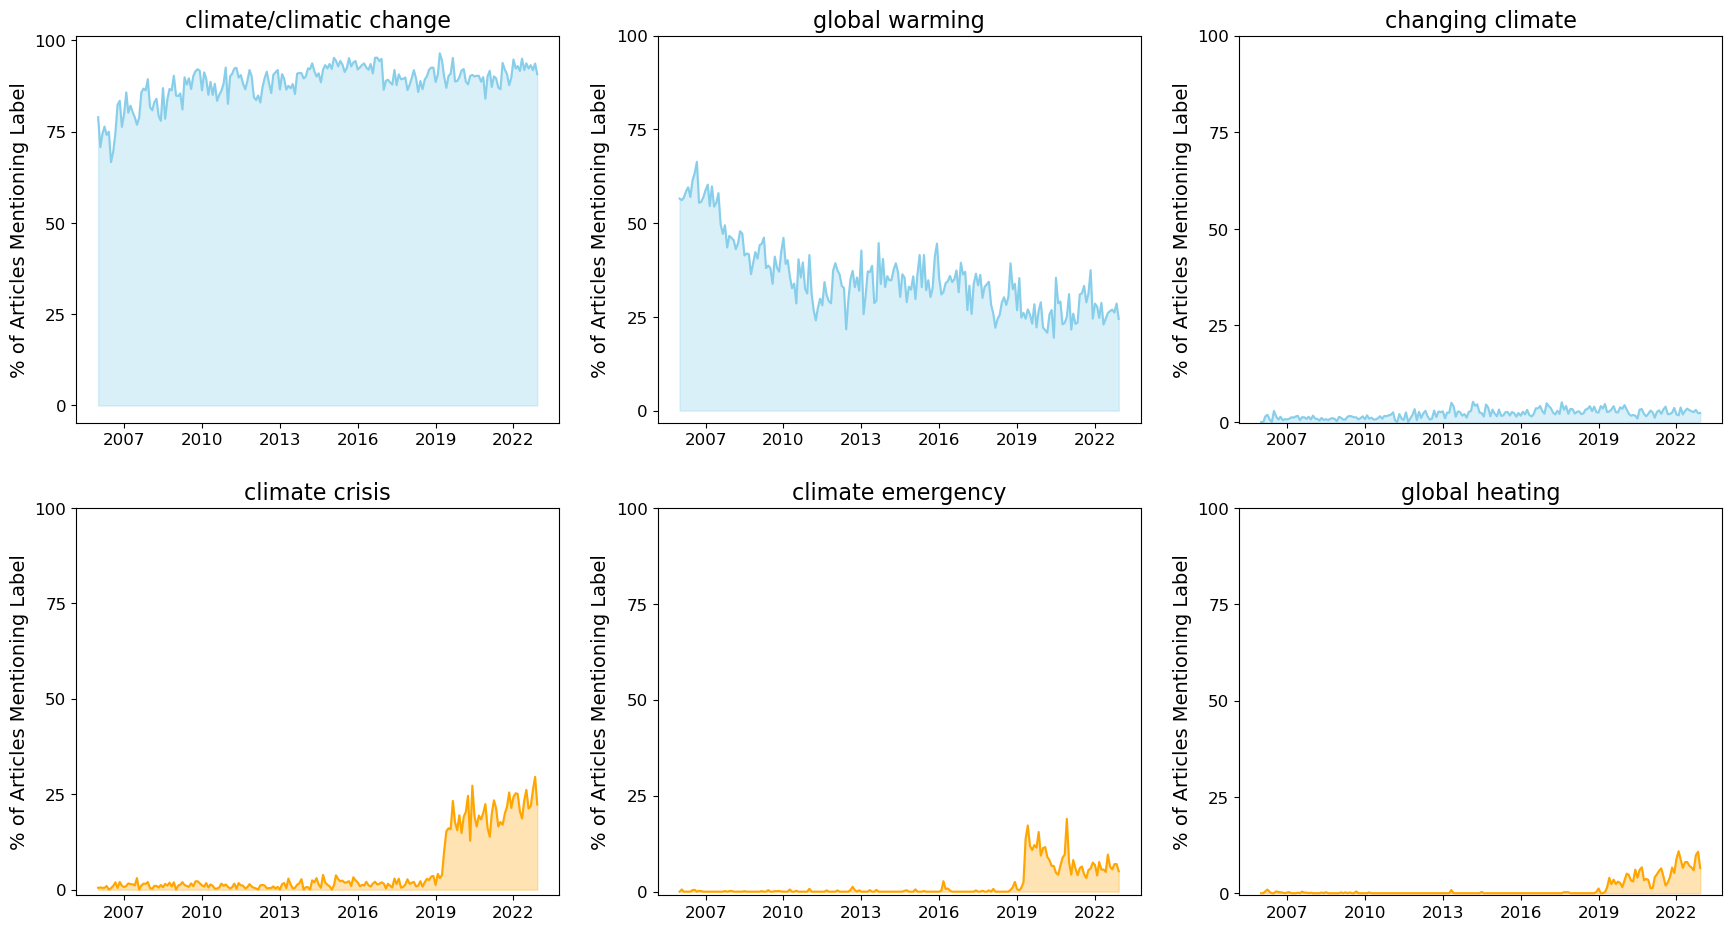

In [84]:
fig, axs = plt.subplots(nrows=2, ncols=3, layout='constrained', figsize=(18,10))
fig.tight_layout(pad=4.0)
#plt.ylabel('% of Articles Mentioning Label')
plotyear(axs[0, 0],"climate/climatic change","skyblue")
plotyear(axs[0, 1],"global warming","skyblue")
plotyear(axs[0, 2],"changing climate","skyblue")
plotyear(axs[1, 0],"climate crisis","orange")
plotyear(axs[1, 1],"climate emergency","orange")
plotyear(axs[1, 2],"global heating","orange")

In [52]:
crisistime = df[['year', "climate crisis_binary"]].groupby(['year']).sum()
crisistime["number_article"]=df[['year', 'filename']].groupby(['year']).count()
crisistime["percentage_climate crisis"]=crisistime['climate crisis_binary']/crisistime["number_article"]*100

In [53]:
crisistime

,climate crisis_binary,number_article,percentage_climate crisis
year,,,
2006,35,3601,0.971952
2007,113,8055,1.402855
2008,62,6199,1.000161
2009,120,8165,1.469688
2010,49,4944,0.991100
2011,44,4656,0.945017
2012,19,3219,0.590245
2013,44,3329,1.321718
2014,63,3823,1.647920


#### RQ3.1

complex imagesgrid: https://matplotlib.org/stable/gallery/subplots_axes_and_figures/demo_constrained_layout.html#sphx-glr-gallery-subplots-axes-and-figures-demo-constrained-layout-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/gridspec_nested.html#sphx-glr-gallery-subplots-axes-and-figures-gridspec-nested-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subfigures.html

In [85]:
def plotcountry(gss,co):

    country = df[["climate/climatic change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
             "greenhouse warming_binary", "warming climate_binary", "changing climate_binary",
             "warmer climate_binary", "planetary warming_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == co]

    c = list()
    c = country.columns.tolist()
    for i in range(len(c)): #Loop every column
            c[i] = c[i].replace("_binary",'')

    country.columns = c

    country["other neutral"] = country[["greenhouse effect","climate warming",
                            "greenhouse warming", "warming climate", "warmer climate", 
                           "planetary warming"]].sum(axis=1)
    country["other neutral"] = country.apply(lambda x: 0 if x["other neutral"] == 0 else 1, axis=1)

    country["other urgent"] = country[["climatic disruption","climate catastrophe", 
                                       "climate chaos","climate disaster","climate breakdown", 
                                       "climate threat"]].sum(axis=1)
    country["other urgent"] = country.apply(lambda x: 0 if x["other urgent"] == 0 else 1, axis=1)

    country.reset_index(inplace=True)
    country.drop(labels = ['index'], axis = 1, inplace = True)

    percentage = (country.sum() / len(country)) * 100

    #fig = plt.figure(layout='constrained')
    #plt.yticks([])
    gs = GridSpecFromSubplotSpec(2, 2, subplot_spec=gss)

    big_subplot = fig.add_subplot(gs[1, :])
    big_subplot.bar(percentage[["neutral","urgent"]].index, percentage[["neutral","urgent"]].values,
           color=["skyblue","orange"])
    plt.title(co, weight='bold', y=-0.25)

    cmap = plt.get_cmap('tab20c')
    top_left_subplot = fig.add_subplot(gs[0, 0])
    top_left_subplot.bar(percentage[["climate/climatic change","global warming", "changing climate", "other neutral"]].index, 
            percentage[["climate/climatic change","global warming", "changing climate", "other neutral"]].values,
            label=percentage[["climate/climatic change","global warming", "changing climate", "other neutral"]].index,
            color=[cmap(i) for i in range(4)])
    p = [0,20,40,60,80,100]
    plt.yticks(p,p)
    plt.xticks([])

    top_right_subplot = fig.add_subplot(gs[0, 1])
    top_right_subplot.bar(percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].index, 
            percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].values,
            label = percentage[["climate crisis","climate emergency", "global heating", "other urgent"]].index,
            color=[cmap(i) for i in range(4,8)])
    p = [0,20,40,60,80,100]
    plt.yticks(p,p)
    plt.xticks([])
    plt.yticks([])


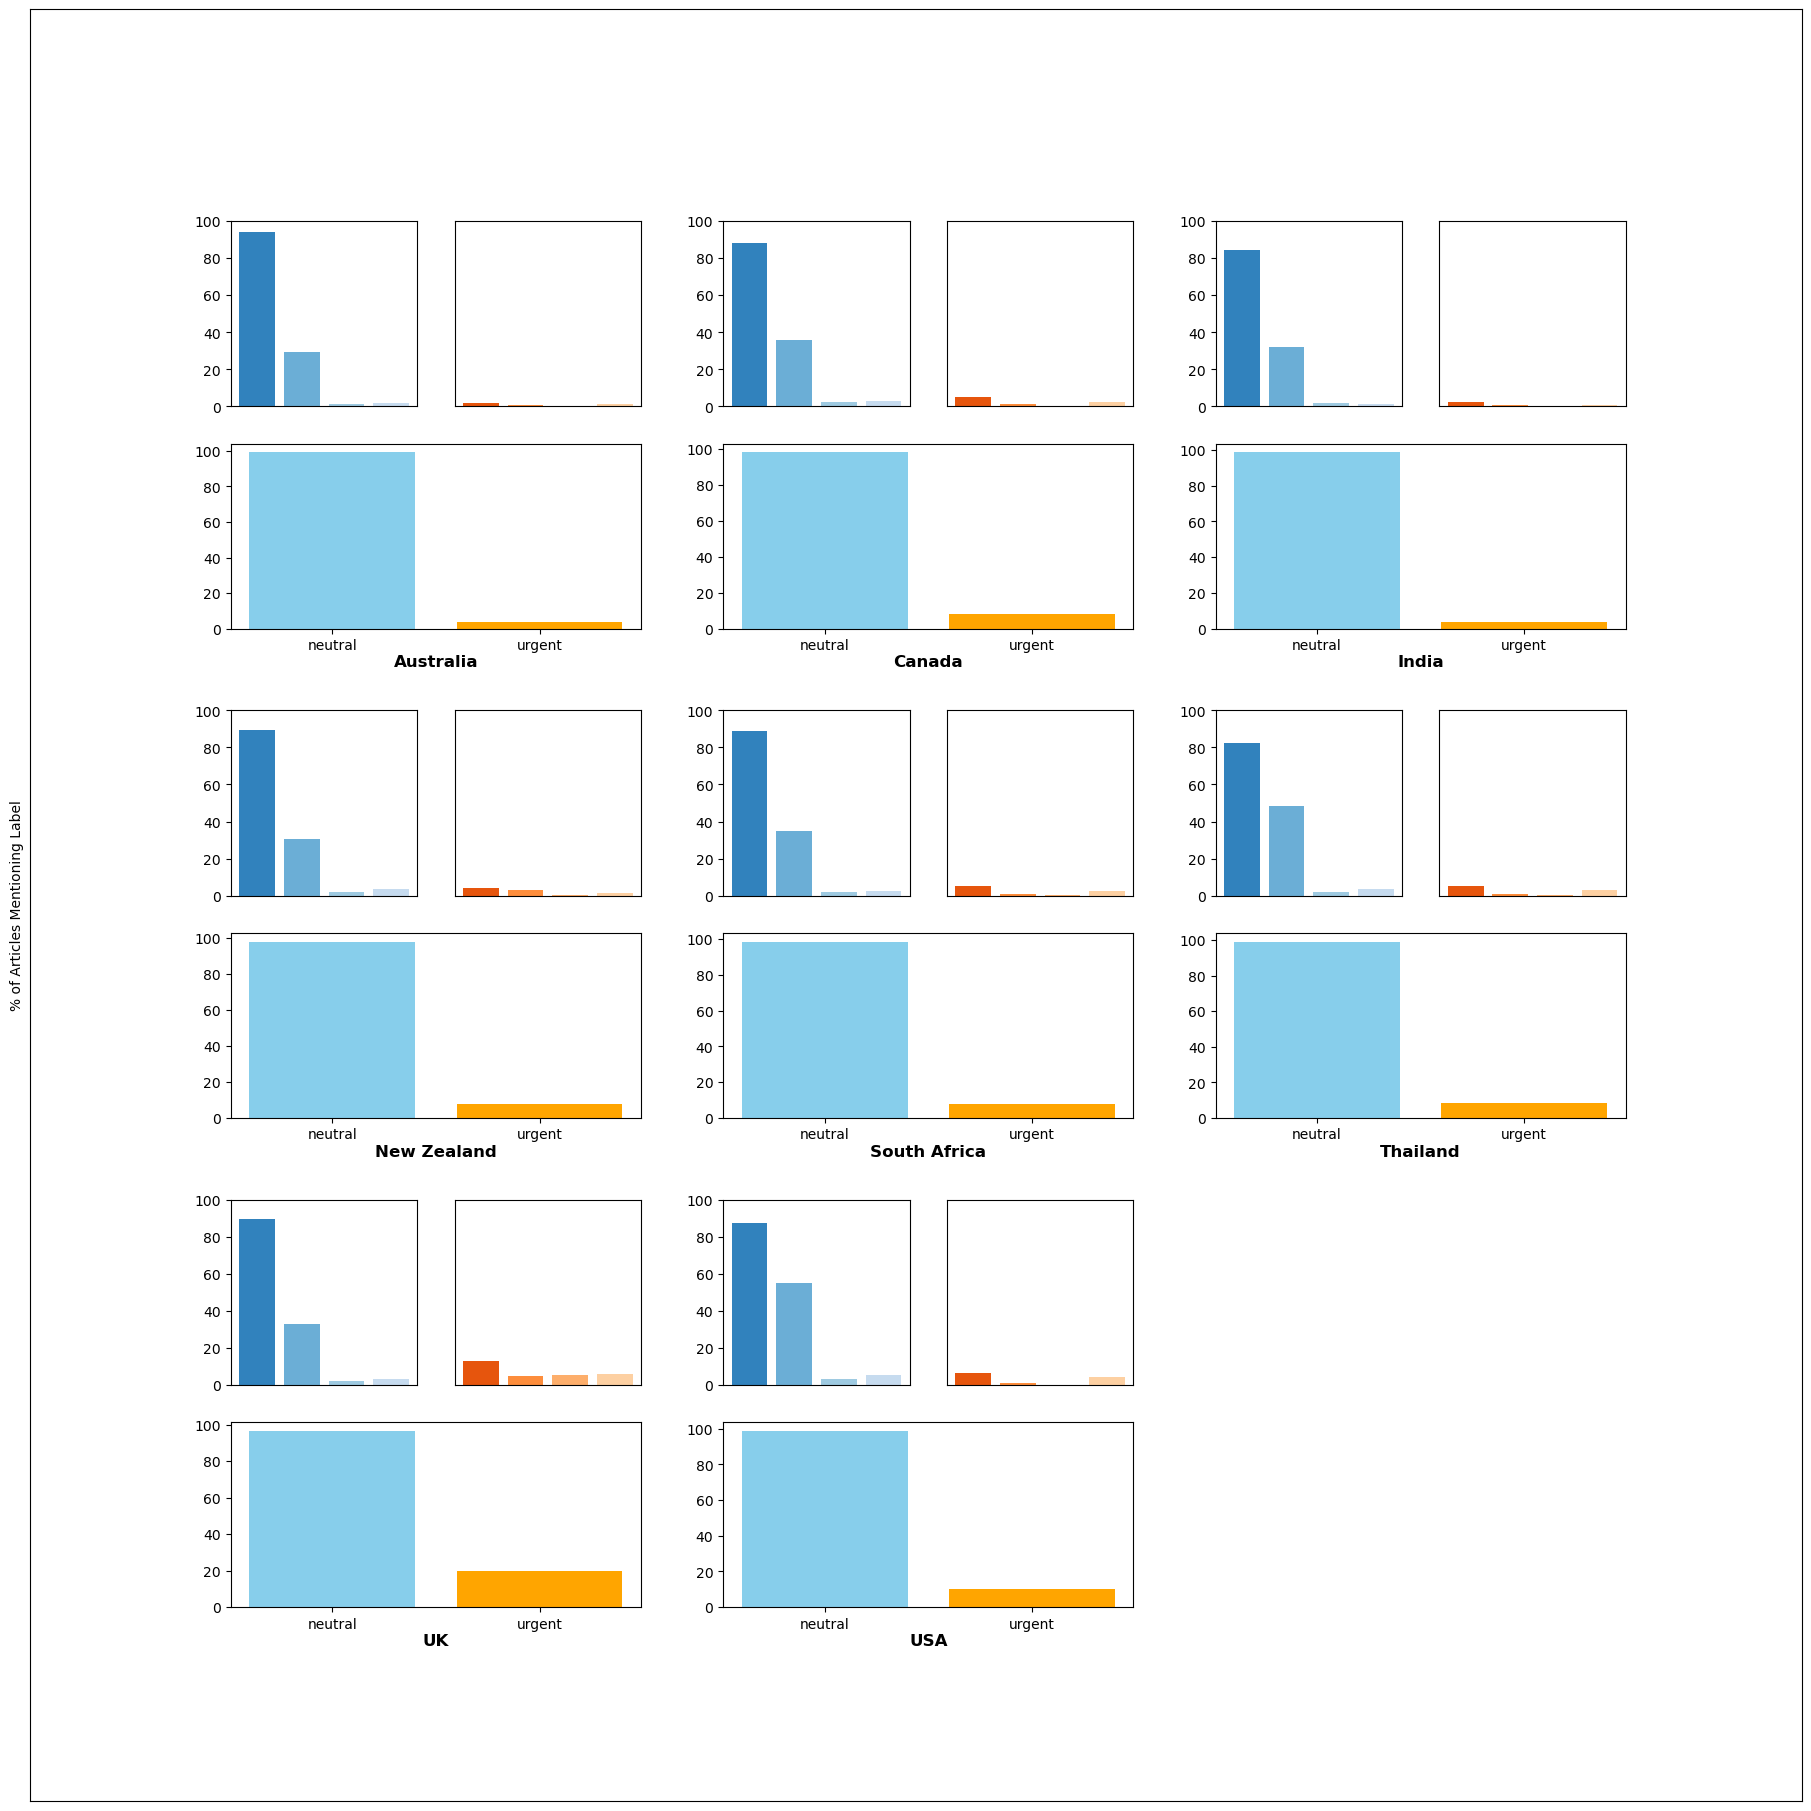

In [86]:
fig = plt.figure(layout='constrained', figsize=(18, 18))
plt.ylabel('% of Articles Mentioning Label')
plt.xticks([])
plt.yticks([])
gs = GridSpec(3, 3)

plotcountry(gs[0, 0],"Australia")
plotcountry(gs[0, 1],"Canada")
plotcountry(gs[0, 2],"India")
plotcountry(gs[1, 0],"New Zealand")
plotcountry(gs[1, 1],"South Africa")
plotcountry(gs[1, 2],"Thailand")
plotcountry(gs[2, 0],"UK")
plotcountry(gs[2, 1],"USA")

#gs.update(wspace=0.2, hspace = 0.2)
#plt.legend()
#plt.tight_layout(pad=10)
plt.show()

In [87]:
Thai = df[["climate/climatic change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
             "greenhouse warming_binary", "warming climate_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == "Thailand"]
Thai["global warming_binary"].value_counts(normalize=True)

0    0.513962
1    0.486038
Name: global warming_binary, dtype: float64

In [88]:
USA = df[["climate/climatic change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
            "greenhouse warming_binary", "warming climate_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == "USA"]
USA["global warming_binary"].value_counts(normalize=True)

1    0.54921
0    0.45079
Name: global warming_binary, dtype: float64

In [89]:
UK = df[["climate/climatic change_binary", "global warming_binary", "greenhouse effect_binary", "climate warming_binary",
             "greenhouse warming_binary", "warming climate_binary", "climatic disruption_binary",
             "climate catastrophe_binary", "climate chaos_binary", "climate crisis_binary", "climate disaster_binary", 
            "climate emergency_binary", "global heating_binary", "climate breakdown_binary", "climate threat_binary",
                  "neutral_binary","urgent_binary"]].loc[df['country'] == "UK"]
UK["climate crisis_binary"].value_counts(normalize=True)

0    0.870748
1    0.129252
Name: climate crisis_binary, dtype: float64

#### RQ3.2

In [90]:
media = df[["climate/climatic change", "global warming", "greenhouse effect", "climate warming", 
            "greenhouse warming", "warming climate", "changing climate", "warmer climate", "planetary warming",
            "climatic disruption", "climate catastrophe", "climate chaos", "climate crisis", "climate disaster", 
            "climate emergency", "global heating", "climate breakdown", "climate threat", "outlet",
            "label_sum"]].groupby(["outlet"]).sum()
media["other neutral"] = media[["climate warming","greenhouse effect", "warmer climate", 
                                "planetary warming", "greenhouse warming", "warming climate"]].sum(axis=1)
media["other urgent"] = media[["climatic disruption","climate catastrophe", 
                                   "climate chaos","climate disaster","climate breakdown", 
                                   "climate threat"]].sum(axis=1)
media2 = media[["climate/climatic change", "global warming", "changing climate", "other neutral", "climate crisis",
               "climate emergency", "global heating", "other urgent"]]
media2 = (media2.div(media.label_sum, axis=0))*100
#media.reset_index(inplace=True)

In [91]:
media2

,climate/climatic change,global warming,changing climate,other neutral,climate crisis,climate emergency,global heating,other urgent
outlet,,,,,,,,
Bangkok Post,71.222040,23.922531,0.518276,0.831969,2.032188,0.259138,0.231860,0.981997
GlobeMail,76.357504,19.724564,0.713884,0.916245,1.247892,0.432827,0.033727,0.573356
Guardian,70.819370,14.108022,0.498143,0.729101,7.174773,1.861244,2.400145,2.409202
Hindu,76.847788,20.448010,0.580193,0.615509,0.933354,0.211896,0.035316,0.327935
Sunday Times,78.950580,13.605857,0.671141,1.098231,3.904820,0.671141,0.122026,0.976205
The Australian,82.763895,15.299668,0.331813,0.645479,0.435504,0.186645,0.028515,0.308482
The Nation,71.251241,24.540715,0.533764,1.117180,1.415094,0.099305,0.161370,0.881331
The New York Times,67.436608,27.266222,0.825097,1.283485,1.833549,0.292921,0.031305,1.030813
The New Zealand Herald,78.413642,17.095521,0.582595,1.080228,1.213740,1.092366,0.097099,0.424809


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120')])

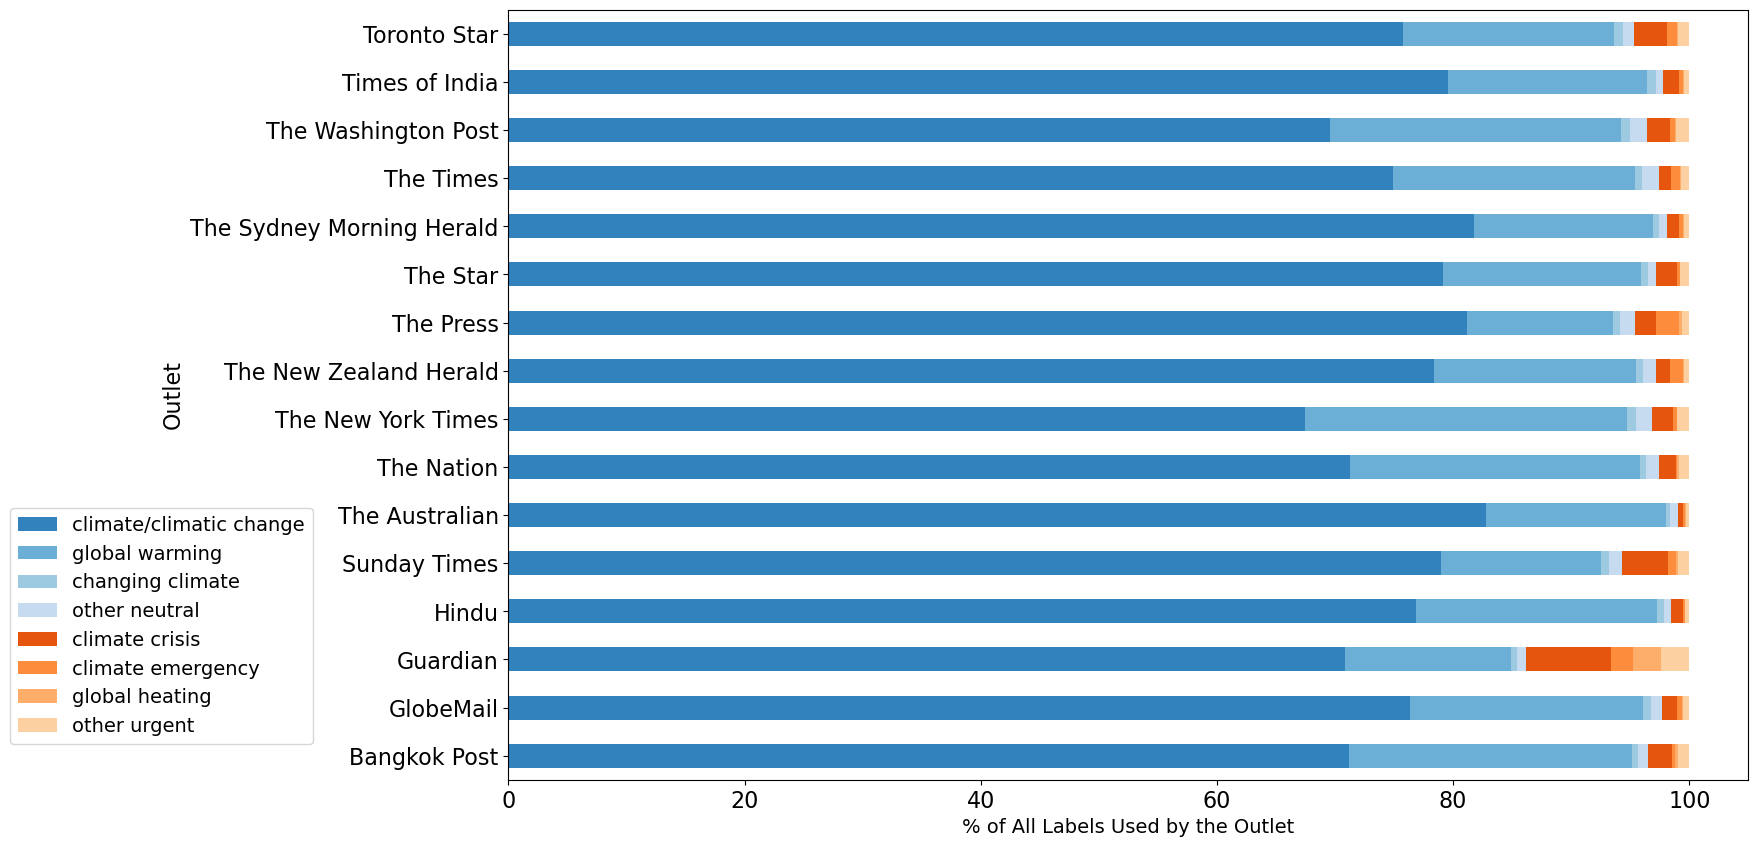

In [92]:
cmap = plt.get_cmap('tab20c')
#plt.figure(figsize=(16, 8))
media2.plot.barh(stacked=True, color=[cmap(i) for i in range(8)],figsize=(16, 10), )

plt.legend(loc='center right', bbox_to_anchor=(-0.15, 0.2), fontsize = 14)
plt.xlabel("% of All Labels Used by the Outlet", fontsize = 14, y=-0.35)
plt.ylabel("Outlet", fontsize = 16)
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)

In [62]:
print(media2[["climate crisis","climate emergency", "global heating", "other urgent"]].sum(axis=1))

outlet
Bangkok Post                  3.505183
GlobeMail                     2.287802
Guardian                     13.845364
Hindu                         1.508501
Sunday Times                  5.674192
The Australian                0.959146
The Nation                    2.557100
The New York Times            3.188587
The New Zealand Herald        2.828013
The Press                     4.582832
The Star                      2.826975
The Sydney Morning Herald     1.869898
The Times                     2.550287
The Washington Post           3.554795
Times of India                2.237913
Toronto Star                  4.685152
dtype: float64
